# Encoding и Decoding аббревиатур

В этом ноутбуке и попытаемся найти в текстах не закодированные медицинские аббревиатуры и сохраним их индексы. Будем работать с выборкой `anamnesis.csv.csv`

In [6]:
import pandas as pd
import numpy as np

Так как Python очень медленный, было решено решить эту задачу на плюсах (см. find_abbrs.cpp) и они были сохранены в файл `term_indexes.csv`

Загрузим найденные термины в текстах

In [8]:
df_terms_indexes = pd.read_csv('data/term_indexes_anamnesises.csv', sep=';', header=None)
df_terms_indexes.columns =['text_id', 'term']

In [9]:
df_terms_indexes.head()

,text_id,term
0,62,больничный лист
1,120,больничный лист
2,221,больничный лист
3,285,больничный лист
4,291,больничный лист


In [10]:
df_terms_indexes.term.unique()

array(['больничный лист', 'лекарственный препарат', 'синдром сухой',
       'позвоночный канал', 'восстановительный период', 'чревный ствол',
       'мочевой пузырь', 'межпозвоночный диск', 'двигательный режим',
       'плечевой пояс', 'послеоперационный период', 'передний отросток',
       'инфекционный процесс', 'мозг средний', 'задний проход',
       'кавернозный синус', 'атеросклероз облитерирующий',
       'главный специалист', 'запястный канал', 'локтевой отросток',
       'геморроидальный узел', 'синдром запястный', 'детский сад',
       'климактерический период', 'синдром абдоминальный',
       'менструальный цикл', 'послеродовой период', 'шиловидный отросток',
       'илеоцекальный угол', 'декретный отпуск', 'позвоночный столб',
       'решетчатый лабиринт', 'синдром малый', 'стеноз митральный',
       'варолиев мост', 'синдром токсический', 'цервикальный канал',
       'горячий цех', 'большой бугорок', 'семенной канатик',
       'синдром пирамидный', 'остистый отросток', 'hal

Сопоставим с текстом

In [3]:
df_texts = pd.read_csv('data/norm_prepared_anamnesises.csv', sep='\t')

In [5]:
df_terms_indexes['doc_text'] = df_terms_indexes.text_id.apply(lambda x: df_texts.norm_diagnosis[x])

In [37]:
import re

def abbr_by_first_letters(x):
    return "".join([a[0] for a in re.split('[- ]', x) if len(a) > 0])

In [38]:
df_terms_indexes['term_encoded'] = df_terms_indexes.term.map(abbr_by_first_letters)

Зададим каждому термину id

In [39]:
idx2term = sorted(set(df_terms_indexes.term))
term2idx = {u: i for i, u in enumerate(idx2term)}

df_terms_indexes['term_id'] = df_terms_indexes.term.map(term2idx.get)

In [40]:
df_terms_indexes.head()

,text_id,term,doc_text,term_encoded,term_id
0,2797,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2
1,2798,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2
2,2799,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2
3,2800,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2
4,2801,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2


Найдем количество документов с данными терминами

In [41]:
term_counter = df_terms_indexes.groupby('term_id').count()['text_id']

In [42]:
df_terms_indexes['term_count'] = df_terms_indexes.term_id.apply(lambda x: term_counter[x])

In [43]:
df_terms_indexes.head()

,text_id,term,doc_text,term_encoded,term_id,term_count
0,2797,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
1,2798,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
2,2799,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
3,2800,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
4,2801,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 720x720 with 0 Axes>

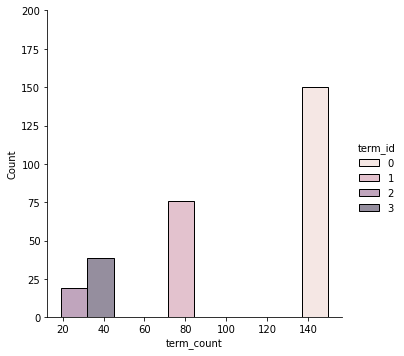

In [48]:
plt.figure(figsize=(10, 10))
sns.displot(x='term_count', hue='term_id', data=df_terms_indexes)
plt.ylim(0, 200)
plt.show()

Оставим только те термины, которые встречаются более 250 раз

In [60]:
df_terms_stripped = df_terms_indexes[
        (df_terms_indexes.term_count >= 0) &
        (df_terms_indexes.term_count <= 300)]

In [61]:
df_terms_stripped.head()

,text_id,term,doc_text,term_encoded,term_id,term_count
0,2797,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
1,2798,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
2,2799,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
3,2800,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19
4,2801,стеноз аортальный,q23.0 врожденный стеноз аортальный клапан,са,2,19


In [62]:
df_terms_stripped.shape

(284, 6)

Выведем уникальные словосочетания для каждых из аббревиатур

In [63]:
df_terms_stripped.groupby('term_encoded').term.nunique().sort_values(ascending=False).head()

term_encoded
см    1
са    1
мд    1
жп    1
Name: term, dtype: int64

Как мы видим, каждой аббревиатуре соотвествует только одно словосочетание(если будем запоминать закодированные обозначения, то мы переобучимся)

Закодируем найденные аббревиатуры в три шага:

1. Найдем кодировку термина (в этом случае мы считаем, что аббревиатура это первые слова словосочетания)
2. Завернем аббревиатуру в фигурные скобки: ад -> {ад}
3. Заменим в тексте словосочетание на завернутую аббревиатуру

'артериальное давление' -> 'ад' -> '{ад}'

In [64]:
def replace_terms_at_texts(text):
    global ind
    
    term = df_terms_stripped.term.iloc[ind]
    ind += 1
    
    return text.replace(term, "{%s}" % abbr_by_first_letters(term))

In [65]:
ind = 0
df_terms_stripped.doc_text = df_terms_stripped.doc_text.apply(lambda text: replace_terms_at_texts(text))

In [66]:
print('Пример')
print('Текст:', df_terms_stripped.doc_text.iloc[0])
print('Аббревиатура:', df_terms_stripped.term.iloc[0])

Пример
Текст: q23.0 врожденный {са} клапан
Аббревиатура: стеноз аортальный


## Декодер

Алгоритм обучения модели:

- На вход подается текст с замененной аббревиатурой и ее расшифровкой
- Мы делим текст на три части: текст до аббревиатуры(ТД), сама аббревиатура(АБ) и текст после аббревиатуры(ТП)
('ее показание {ад} вышло за пределы' -> ('ее показание', 'ад', 'вышло за пределы')
- Затем для векторов ТД и ТП обучим TfidfVectorizer и получим фичи слов до и после аббревитуры
- Саму аббревиатуру сделаем вектором для каждого уникального символа входных текстов сопоставим id. Тогда длина вектора аббревиатур будет равна количеству уникальный символом, если char_i входит в аббревиатуру, тогда i элемент равен 1.
- Объединение векторов ТД, ТП и АБ будет обучающей выборкой (так как сейчас значений аббревиатур не так много, модель переобучится из-за векторов АБ)

(пусть всего три символа в выборке: {'a': 0, 'д': 1, 'с': 2}: тогда 'ад' = [1, 1, 0]'


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [68]:
class AbbreviationDecoder:
    own_attributes = ['model', 'window', 'use_abbr_letters']
    
    def __init__(self, model, window=None, use_abbr_letters=True, **kwargs):
        """
        model: sklearn модель
        window: количество слов, рассматриваемая справа и слева аббревиатуры
        use_abbr_letters: нужно ли использовать буквы аббревиатур
        """
        
        self.window = window
        self.use_abbr_letters = use_abbr_letters
        
        self.model = model
        self.model.set_params(**kwargs)
        
    def init_chars(self, X_train):
        """ Зададим каждому символу уникальный id. """
        self.idx2char = sorted(set("".join(X_train.to_list())))
        self.char2idx = {u:i for i, u in enumerate(self.idx2char)}
        
    def vectorize_abbr(self, abbr):
        vector = np.zeros(len(self.idx2char))
        
        for a in abbr:
            vector[self.char2idx[a]] = 1
            
        return vector
    
    def get_before_abbr_after_text(self, text):
        text_before = ""
        text_after = ""
        text_abbr = ""
        
        fl_code = 0
        
        for ch in text:
            if ch == "{":
                fl_code = 1
            elif ch == "}":
                fl_code = 2
                
            elif fl_code == 0:
                text_before += ch
            elif fl_code == 1:
                text_abbr += ch
            elif fl_code == 2:
                text_after += ch
        
        if self.window:
            text_before = " ".join(text_before.split()[-self.window:])
            text_after = " ".join(text_after.split()[:self.window])
            
        return text_before, text_abbr, text_after
    
    
    def get_text_features(self, x_before, x_abbrs, x_after, fit=False):
        
        if fit:
            self.before_vectorizer = TfidfVectorizer(max_features=200)
            self.after_vectorizer = TfidfVectorizer(max_features=200)
            
            self.before_vectorizer.fit(x_before)
            self.after_vectorizer.fit(x_before)
            
        before_features = self.before_vectorizer.transform(x_before).toarray()
        after_features  = self.after_vectorizer.transform(x_after).toarray()
        
        sample_train = np.hstack((before_features, after_features))
        
        if self.use_abbr_letters:
            sample_train = np.hstack((sample_train, x_abbrs))
            
        return sample_train
    
    def get_vectorized_data(self, data, fit=False):
        x_before = []
        x_abbrs = []
        x_after = []
        
        for sample in data:
            x_b, x_abbr, x_a = self.get_before_abbr_after_text(sample)
            x_before.append(x_b)
            x_abbrs.append(self.vectorize_abbr(x_abbr))
            x_after.append(x_a)
        
        data = self.get_text_features(x_before, x_abbrs, x_after, fit)
        
        return data
    
    
    def fit(self, X_train, y_train):
        """
        X_train - it's a text with encoded abbreviations in brakets
        Y_train - abbreavation decode.
        
        Example:
        ['удовлетворительный наполнение и напряжение. {вт} систолический шум на верхушка.']
        ['верхушечный толчок']
        """
        
        self.init_chars(X_train)
        data_train = self.get_vectorized_data(X_train, fit=True)
        self.model.fit(data_train, y_train)
        
        return self
    
    def predict(self, X_test):
        test_data = self.get_vectorized_data(X_test)
            
        return self.model.predict(test_data)
    
    def predict_proba(self, X_test):
        test_data = self.get_vectorized_data(X_test)
        
        return self.model.predict_proba(test_data)
    
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test).reshape(-1, )
        
        return sum(y_pred == y_test) / len(y_test)
    
    def __repr__(self):
        return 'Abbreviation decoder with model:\n' + str(self.model)
    
    def get_params(self, **params):
        out_params = self.model.get_params(**params)
        
        out_params.update({
            'model': self.model,
            'window' : self.window,
            'use_abbr_letters': self.use_abbr_letters
        })
        
        return out_params
    
    def set_params(self, **params):
        print(params)
        if not params:
            return self
        
        for attr in self.own_attributes:
            if attr in params:
                setattr(self, attr, params[attr])
                
            params.pop(attr, None)
            
        self.model.set_params(**params)
        
        return self

Попробуем обучить baseline модель

Разделим выборку на обучающую и тестирующую

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_terms_stripped.doc_text, df_terms_stripped.term_id, test_size=0.3, random_state=42)

In [71]:
df_labels = pd.DataFrame([y_train.value_counts(), y_test.value_counts()]).T
df_labels.columns = ['количество в обучающей выборке', 'количество в тестирующей выборке']
df_labels = df_labels.sort_values('количество в обучающей выборке', ascending=False)
df_labels.head(10)

,количество в обучающей выборке,количество в тестирующей выборке
0,99,51
1,54,22
3,29,10
2,16,3


Объявим и обучим нашу модель сначала с буквами аббревиатур

In [72]:
model = AbbreviationDecoder(
    model=RandomForestClassifier(random_state=42), 
    window=5)

In [73]:
model.fit(X_train, y_train)

Abbreviation decoder with model:
RandomForestClassifier(random_state=42)

Посчитаем метрики

In [74]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn import metrics

In [75]:
print('accuracity: %.4f' % model.score(X_test, y_test))
print('precission: %.4f' % precision_score(model.predict(X_test), y_test, average='weighted', zero_division=True))
print('recall    : %.4f' % recall_score(model.predict(X_test), y_test, average='weighted', zero_division=True))

accuracity: 1.0000
precission: 1.0000
recall    : 1.0000


Да, как и ожидалось, переобучились. Попробуем без значений букв

In [76]:
import xgboost as xgb

In [77]:
model = AbbreviationDecoder(
    model=RandomForestClassifier(max_depth=10, random_state=42), 
    use_abbr_letters=False,
    window=5)

In [78]:
model.fit(X_train, y_train)

Abbreviation decoder with model:
RandomForestClassifier(max_depth=10, random_state=42)

In [79]:
print('accuracity: %.4f' % model.score(X_test, y_test))
print('precission: %.4f' % precision_score(model.predict(X_test), y_test, average='weighted', zero_division=True))
print('recall    : %.4f' % recall_score(model.predict(X_test), y_test, average='weighted', zero_division=True))

accuracity: 1.0000
precission: 1.0000
recall    : 1.0000


In [80]:
idx2term[model.predict(['его {ад} превысело норму']).reshape(-1)[0]]

'стеноз аортальный'

Если вообще не использовать значение аббревиатур, то результат похуже, но когда данных будет побольше, то можно уже будет воспользоваться значениями аббревиатур, тогда метрики вырастут

Дальше не будем пользоваться значениями аббревиатур

In [82]:
from catboost import CatBoostClassifier

In [83]:
model = AbbreviationDecoder(
    model=CatBoostClassifier(verbose=0),
    use_abbr_letters=False,
    window=5)

model.fit(X_train, y_train)

Abbreviation decoder with model:

In [84]:
print('accuracity: %.4f' % model.score(X_test, y_test))
print('precission: %.4f' % precision_score(model.predict(X_test), y_test, average='weighted', zero_division=True))
print('recall    : %.4f' % recall_score(model.predict(X_test), y_test, average='weighted', zero_division=True))

accuracity: 1.0000
precission: 1.0000
recall    : 1.0000


## Тюнинг модели

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
def evaluate_model_performnce(y_test, y_pred, y_score):
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = metrics.balanced_accuracy_score(y_test, y_pred)
    
    print("Precision : ",precision)
    print("Recall : ",recall)
    print("F1 Score : ",f1)
    print("Balanced Accuracy : ",accuracy)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy Score : ", accuracy)
    
    if len(np.unique(y_test)) != y_score.shape[1]:
        roc_auc = metrics.roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')
        print("ROC-AUC Value : ", roc_auc)
    
    return accuracy, roc_auc, f1

In [178]:
def fit_and_get_stats(clf_model):
    model = AbbreviationDecoder(
        model=clf_model,
        use_abbr_letters=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)
    
    print(type(clf_model).__name__)
    
    return y_pred, model, type(clf_model).__name__, *evaluate_model_performnce(y_test, y_pred, y_score)

In [179]:
def models_stats(*model_list):
    stats = []
    fited_model_list = []
    y_preds = []
    
    for model in model_list:
        y_pred, model, *predict_stats = fit_and_get_stats(model)
        stats.append(predict_stats)
        y_preds.append(y_pred)
        fited_model_list.append(model)
        print('\n')
        
    return y_preds, fited_model_list, pd.DataFrame(stats, columns=['model', 'accuracy', 'roc_auc', 'f1_score'])

In [180]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [181]:
y_preds, model_list, df_results = models_stats(
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=0),
)

KeyboardInterrupt: 

In [95]:
lr_clf, rfc_clf, xgb_clf, lgb_clf, cat_clf = model_list

In [101]:
from sklearn.ensemble import VotingClassifier

In [182]:
v_xgb = XGBClassifier()
v_lgb = LGBMClassifier()
v_cat = CatBoostClassifier(verbose=0)

v_clf = VotingClassifier(
    estimators=[
        ('xgb', v_xgb), 
        ('lgb', v_lgb), 
        ('cat', v_cat)], 
    voting='soft')

fit_and_get_stats(v_clf)

VotingClassifier
Precision :  0.9640458399371741
Recall :  0.9669565217391304
F1 Score :  0.9654989871410548
Balanced Accuracy :  0.6948545241308399
Accuracy Score :  0.9669565217391304


/Users/michil/.virtualenvs/cs102/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Number of classes in y_true not equal to the number of columns in 'y_score'